# Data Preparation and Explorative Analysis Workbook

## Import libraries and modules

In [2]:
import pandas as pd
import html
from sklearn.model_selection import train_test_split

## 1 - Data Cleaning and Preprocessing

In [3]:
# Read in the training data
train_df = pd.read_json('./data/lewtun-drug-reviews/train.jsonl', lines=True)
train_df.sample(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
3135,158767,Methylphenidate,Narcolepsy,"""I didn&#039;t give this a 10 simply because I...",9,2008-11-12,39
45109,220065,Amitriptyline,Anxiety and Stress,"""I was given this pill for pain relief. It onl...",1,2016-04-02,12
71455,104984,Ethinyl estradiol / levonorgestrel,Birth Control,"""Fantastic experience. 9 months on Seasoniqu...",10,2009-07-11,28
3568,191416,Lisdexamfetamine,ADHD,"""This medication saved my life! Better than an...",10,2016-03-02,43
91342,220800,Loestrin 24 Fe,Birth Control,"""I have been using this for over 3 years now. ...",9,2010-01-11,15


In [4]:
# Check for duplicated id
train_df.duplicated(subset=['Unnamed: 0']).sum()

0

In [5]:
# Decode HTML entities back to original characters and remove whitespaces
train_df['review'] = train_df['review'].apply(html.unescape).str.replace(r'[\r\n\t]', '', regex=True).str.strip()

In [6]:
# Check for data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


In [7]:
train_df[train_df.condition.isna()]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,None,"""Very good response. It is so useful for me. """,10,2010-08-18,1
148,61073,Urea,None,"""Accurate information.""",10,2011-07-02,13
488,132651,Doxepin,None,"""So far so good. Good for me and I can take it...",10,2010-10-20,25
733,44297,Ethinyl estradiol / norgestimate,None,"""I haven't been on it for a long time and I ha...",8,2011-01-24,1
851,68697,Medroxyprogesterone,None,"""I started the shot in July 2015 and ended in ...",6,2017-03-23,1
...,...,...,...,...,...,...,...
160468,117817,Multivitamin with minerals,None,"""Severe hives itching after taking for 6 months""",5,2015-11-15,0
160500,657,Medroxyprogesterone,None,"""I am 18 and I have been using the shot for 8 ...",6,2011-11-20,2
160689,104844,Ethinyl estradiol / levonorgestrel,None,"""I've been on Loseasonique for about 2 weeks n...",10,2010-04-13,3
160752,41252,Acetaminophen / oxycodone,None,"""This is my third day using this pain medicine...",10,2010-12-13,4


In [8]:
# Check the unique values of categorical variables
print(train_df.drugName.value_counts())
print('-' * 65)
print(train_df.condition.value_counts())

drugName
Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: count, Length: 3436, dtype: int64
-----------------------------------------------------------------
condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity D

<Axes: xlabel='drugName'>

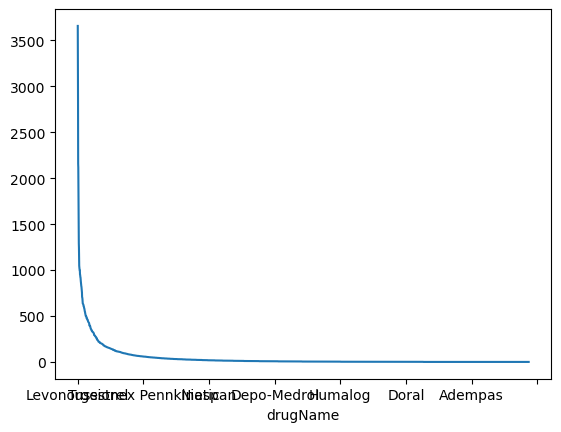

In [15]:
train_df.drugName.value_counts().plot()

<Axes: title={'center': 'Density Plot'}, ylabel='Density'>

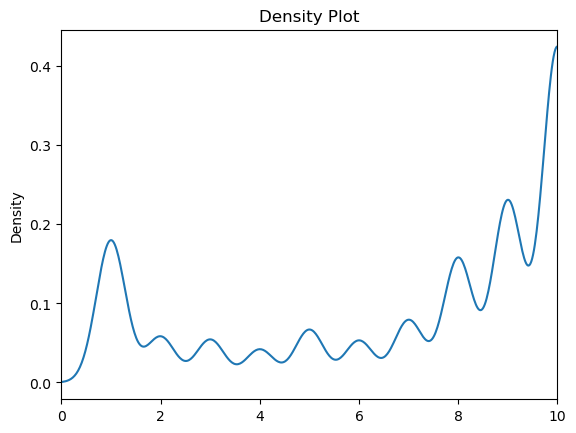

In [13]:
train_df.rating.plot(kind='density', title='Density Plot', xlabel='Value', ylabel='Density', xlim=(0, 10))

In [16]:
train_df.rating

0          9
1          8
2          5
3          8
4          9
          ..
161292    10
161293     1
161294     2
161295    10
161296     9
Name: rating, Length: 161297, dtype: int64